<a href="https://colab.research.google.com/github/AlnBnd/facegan/blob/master/face_edited.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow==1.14

In [ ]:
%%time
%tensorflow_version 1.x
!pip install tensorflow-gpu==1.14
import os

In [3]:
# !pip install numpy==1.16.4

In [4]:
import os
import math
import pickle
import imageio
import PIL.Image
import numpy as np
from PIL import Image
import tensorflow as tf

import moviepy.editor as mpy
import matplotlib.pyplot as plt
from IPython.display import clear_output
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:544: FutureWa

Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)2793472/45929032 bytes (6.1%)6840320/45929032 bytes (14.9%)10829824/45929032 bytes (23.6%)15007744/45929032 bytes (32.7%)18857984/45929032 bytes (41.1%)22953984/45929032 bytes (50.0%)27000832/45929032 bytes (58.8%)31186944/45929032 bytes (67.9%)35364864/45929032 bytes (77.0%)39362560/45929032 bytes (85.7%)43409408/45929032 bytes (94.5%)45929032/45929032 bytes (100.0%)
  Done
File saved as /root

In [5]:
!git clone https://github.com/AlnBnd/facegan.git

Cloning into 'facegan'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 268 (delta 15), reused 2 (delta 0), pack-reused 234
Receiving objects: 100% (268/268), 108.53 MiB | 24.29 MiB/s, done.
Resolving deltas: 100% (30/30), done.


In [6]:
os.chdir('/content/facegan/networks')

In [7]:
!wget http://d36zk2xti64re0.cloudfront.net/stylegan2/networks/stylegan2-ffhq-config-f.pkl 

--2021-02-26 20:54:25--  http://d36zk2xti64re0.cloudfront.net/stylegan2/networks/stylegan2-ffhq-config-f.pkl
Resolving d36zk2xti64re0.cloudfront.net (d36zk2xti64re0.cloudfront.net)... 65.9.76.217, 65.9.76.211, 65.9.76.193, ...
Connecting to d36zk2xti64re0.cloudfront.net (d36zk2xti64re0.cloudfront.net)|65.9.76.217|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 381673535 (364M) [application/x-www-form-urlencoded]
Saving to: ‘stylegan2-ffhq-config-f.pkl’

stylegan2-ffhq-conf 100%[===================>] 363.99M   190MB/s    in 1.9s    

2021-02-26 20:54:27 (190 MB/s) - ‘stylegan2-ffhq-config-f.pkl’ saved [381673535/381673535]



In [8]:
os.chdir('/content/facegan')

In [9]:
!python main.py

/usr/local/lib/python3.7/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:544: FutureWa

In [ ]:
!python photo_edit.py

In [11]:
from photo_edit import read_face_latent
from photo_edit import move_latent_and_save

In [12]:
w, Gs_network, Gs_syn_kwargs = read_face_latent()

Setting up TensorFlow plugin "fused_bias_act.cu": Preprocessing... Loading... Done.
Setting up TensorFlow plugin "upfirdn_2d.cu": Preprocessing... Loading... Done.


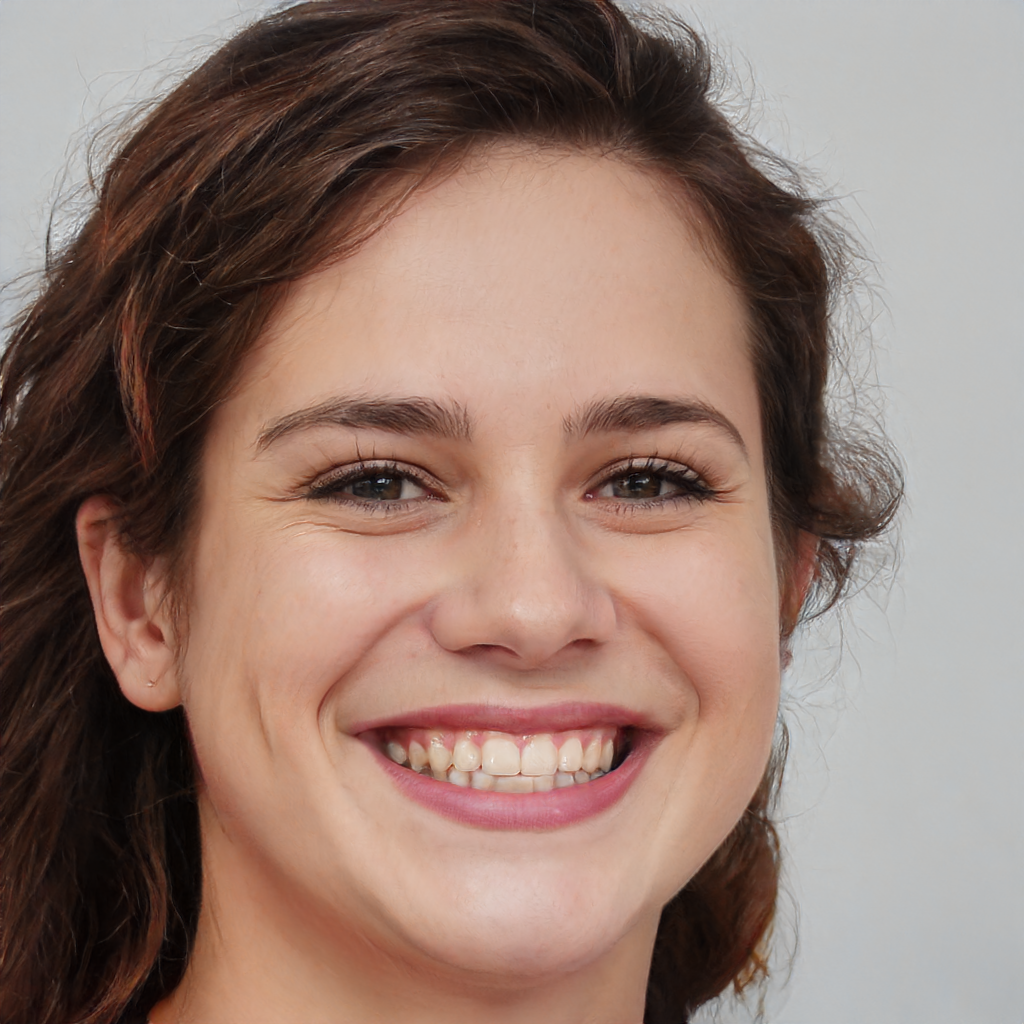

In [18]:
# @title { display-mode: "form", run: "auto" }
#@markdown **Выберите параметры:**
parameter1 = 'gender' #@param ["age", "angle_horizontal",  "angle_pitch", "beauty", "emotion_angry", "emotion_disgust", "emotion_easy", "emotion_fear", "emotion_happy", "emotion_sad", "emotion_surprise", "eyes_open", "face_shape", "gender", "glasses", "height", "race_black", "race_white", "race_yellow", "smile", "width"]
direction_file1 = np.load('latent_directions/' + parameter1 + '.npy')
intensity1 = 8 #@param {type:"slider", min:-10.0, max:10.0, step:0.5}
active1 = True #@param {type:"boolean"}
if active1 == True:
    intensity1 *= 1
else:
    intensity1 *= 0

parameter2 = 'angle_pitch' #@param ["age", "angle_horizontal",  "angle_pitch", "beauty", "emotion_angry", "emotion_disgust", "emotion_easy", "emotion_fear", "emotion_happy", "emotion_sad", "emotion_surprise", "eyes_open", "face_shape", "gender", "glasses", "height", "race_black", "race_white", "race_yellow", "smile", "width"]
direction_file2 = np.load('latent_directions/' + parameter2 + '.npy')
intensity2 = 1.5 #@param {type:"slider", min:-10.0, max:10.0, step:0.5}
active2 = True #@param {type:"boolean"}
if active2 == True:
    intensity2 *= 2
else:
    intensity2 *= 0

parameter3 = 'emotion_happy' #@param ["age", "angle_horizontal",  "angle_pitch", "beauty", "emotion_angry", "emotion_disgust", "emotion_easy", "emotion_fear", "emotion_happy", "emotion_sad", "emotion_surprise", "eyes_open", "face_shape", "gender", "glasses", "height", "race_black", "race_white", "race_yellow", "smile", "width"]
direction_file3 = np.load('latent_directions/' + parameter2 + '.npy')
intensity3 = 5.5 #@param {type:"slider", min:-10.0, max:10.0, step:0.5}
active3 = True #@param {type:"boolean"}
if active3 == True:
    intensity3 *= 1
else:
    intensity3 *= 0

parameter4 = 'smile' #@param ["age", "angle_horizontal",  "angle_pitch", "beauty", "emotion_angry", "emotion_disgust", "emotion_easy", "emotion_fear", "emotion_happy", "emotion_sad", "emotion_surprise", "eyes_open", "face_shape", "gender", "glasses", "height", "race_black", "race_white", "race_yellow", "smile", "width"]
direction_file4 = np.load('latent_directions/' + parameter4 + '.npy')
intensity4 = -8 #@param {type:"slider", min:-10.0, max:10.0, step:0.5}
active4 = True #@param {type:"boolean"}
if active4 == True:
    intensity4 *= 1
else:
    intensity4 *= 0

parameter5 = 'glasses' #@param ["age", "angle_horizontal",  "angle_pitch", "beauty", "emotion_angry", "emotion_disgust", "emotion_easy", "emotion_fear", "emotion_happy", "emotion_sad", "emotion_surprise", "eyes_open", "face_shape", "gender", "glasses", "height", "race_black", "race_white", "race_yellow", "smile", "width"]
direction_file5 = np.load('latent_directions/' + parameter3 + '.npy')
intensity5 = 5.5 #@param {type:"slider", min:-10.0, max:10.0, step:0.5}
active5 = False #@param {type:"boolean"}
if active5 == True:
    intensity5 *= 1
else:
    intensity5 *= 0

#@markdown **Разрешение изображения:**
resolution = "1024" #@param [128, 256, 512, 1024]
size = int(resolution), int(resolution)


direction_intensity = (direction_file1 * intensity1) + (direction_file2 * intensity2) + \
                (direction_file3 * intensity3)  + (direction_file4 * intensity4) + (direction_file5 * intensity5)
move_latent_and_save(w, size, direction_intensity, Gs_network, Gs_syn_kwargs)